In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [7]:
data = pd.read_csv("data/ObesityDataSet.csv")

data = data.iloc[:, 2:4]    
data

,Height,Weight
0,1.620000,64.000000
1,1.520000,56.000000
2,1.800000,77.000000
3,1.800000,87.000000
4,1.780000,89.800000
...,...,...
2106,1.710730,131.408528
2107,1.748584,133.742943
2108,1.752206,133.689352
2109,1.739450,133.346641


In [8]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

,Height,Weight
0,-0.875589,-0.862558
1,-1.947599,-1.168077
2,1.054029,-0.366090
3,1.054029,0.015808
4,0.839627,0.122740


In [ ]:
km = KMeans(init="random", n_clusters=3)
predicted = km.fit_predict(data)
data['cluster'] = predicted
data

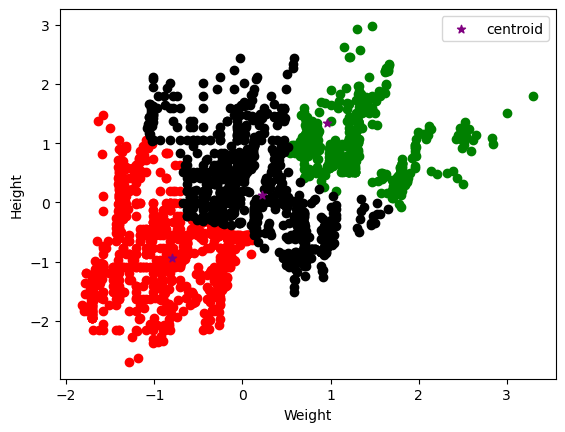

In [15]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Weight,data1['Height'],color='green')
plt.scatter(data2.Weight,data2['Height'],color='red')
plt.scatter(data3.Weight,data3['Height'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()